# Using Python for Research Homework: Week 5, Case Study Part 1

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 1, we will inspect, clean, and transform the data.

### Exercise 1

First, we will import several libraries. `scikit-learn` (**sklearn**) contains helpful statistical models, and we'll use the `matplotlib.pyplot` library for visualizations. Of course, we will use `numpy` and `pandas` for data manipulation throughout.

#### Instructions 

- Read and execute the given code.
- Call `df.head()` to take a look at the data.

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

# Enter code here.

print(df.head)

<bound method NDFrame.head of          budget                                       genres  \
0     237000000  Action, Adventure, Fantasy, Science Fiction   
1     300000000                   Adventure, Fantasy, Action   
2     245000000                     Action, Adventure, Crime   
3     250000000               Action, Crime, Drama, Thriller   
4     260000000           Action, Adventure, Science Fiction   
...         ...                                          ...   
4798     220000                      Action, Crime, Thriller   
4799       9000                              Comedy, Romance   
4800          0             Comedy, Drama, Romance, TV Movie   
4801          0                                          NaN   
4802          0                                  Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   


### Exercise 2

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions 
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [3]:
# Enter code here.
#we will define the regression and classification outcomes. Specifically, 
#we will use the revenue column as the target for regression. For 
#classification, we will construct an indicator of profitability for each movie.
df.loc[df["revenue"] >  df["budget"],"profitable"] = 1
df.loc[df["revenue"] <=  df["budget"],"profitable"] = 0
df["profitable"] = pd.to_numeric(df["profitable"]).astype(int)
regression_target = "revenue"
classification_target = "profitable"
np.sum(df["profitable"])

2585

### Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

#### Instructions 

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. Do any further arguments need to be specified in this function to remove rows with any such values?

In [4]:
# Enter code here.
#For simplicity, we will proceed by analyzing only the rows without any 
#missing data. In this exercise, we will remove rows with any infinite 
#or missing values.
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

df


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",1
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",1
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An...",1
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",1
5,258000000,"Fantasy, Action, Adventure",http://www.sonypictures.com/movies/spider-man3/,559,"dual identity, amnesia, sandstorm, love of one...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"Columbia Pictures, Laura Ziskin Productions, M...",...,139.0,"English, Français",Released,The battle within.,Spider-Man 3,5.9,3576,559,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",1
6,260000000,"Animation, Family",http://disney.go.com/disneypictures/tangled/,38757,"hostage, magic, horse, fairy tale, musical, pr...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"Walt Disney Pictures, Walt Disney Animation St...",...,100.0,English,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,"Zachary Levi, Mandy Moore, Donna Murphy, Ron P...",1
7,280000000,"Action, Adventure, Science Fiction",http://marvel.com/movies/movie/193/avengers_ag...,99861,"marvel comic, sequel, superhero, based on comi...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"Marvel Studios, Prime Focus, Revolution Sun St...",...,141.0,English,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,99861,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",1
8,250000000,"Adventure, Fantasy, Family",http://harrypotter.warnerbros.com/harrypottera...,767,"witch, magic, broom, school of witchcraft, wiz...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"Warner Bros., Heyday Films",...,153.0,English,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,767,"Daniel Radcliffe, Rupert Grint, Emma Watson, T.

### Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions 

- Determine all the genres in the genre column. Make sure to use the `strip()` function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Call `df[genres].head()` to view your results.

In [5]:
# Enter code here.
#Many of the variables in our dataframe contain the names of genre, 
#actors/actresses, and keywords. Let's add indicator columns for each genre.
genres_list = df.genres.apply(lambda x: x.split(","))
genres = []
for row in genres_list:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre)

for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

print(df[genres].head())

   Action  Adventure  Fantasy  Science Fiction  Crime  Drama  Thriller  \
0       1          1        1                1      0      0         0   
1       1          1        1                0      0      0         0   
2       1          1        0                0      1      0         0   
3       1          0        0                0      1      1         1   
4       1          1        0                1      0      0         0   

   Animation  Family  Western  Comedy  Romance  Horror  Mystery  War  History  \
0          0       0        0       0        0       0        0    0        0   
1          0       0        0       0        0       0        0    0        0   
2          0       0        0       0        0       0        0    0        0   
3          0       0        0       0        0       0        0    0        0   
4          0       0        0       0        0       0        0    0        0   

   Music  Documentary  TV Movie  Foreign  
0      0            0    

### Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions 
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_covariates` in df.
    - Is the skew above 1 for any of these variables?

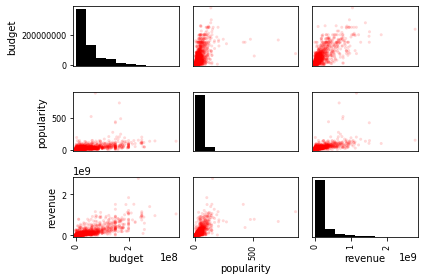

budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64

In [6]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
# show the plot.

# determine the skew.
plt.tight_layout()
plt.show()
df[outcomes_and_continuous_covariates].skew()



### Exercise 6

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed. In this exercise, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions 
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [7]:
# Enter your code here.
df.budget = np.log10(1+df.budget)
df.popularity = np.log10(1+df.popularity)
df.runtime = np.log10(1+df.runtime)
df.vote_count = np.log10(1+df.vote_count)
df.revenue = np.log10(1+df.revenue)

print(df.runtime.skew())

0.5304890161265847


### Exercise 7

Let's now save our dataset. 

#### Instructions 
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

In [8]:
# Enter your code here
df.to_csv("movies_clean.csv")